In [1]:
import pandas as pd

In [19]:
import numpy as np

In [6]:
df = pd.read_csv("C:\\Users\\Dell\\OneDrive\\Attachments\\startup_funding.csv")

In [20]:
df.head(10)

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN
5,6,13/01/2020,Pando,Logistics,"Open-market, freight management platform",Chennai,Chiratae Ventures,Series A,"90,00,000",NaN
6,7,10/01/2020,Zomato,Hospitality,Online Food Delivery Platform,Gurgaon,Ant Financial,Private Equity Round,"15,00,00,000",NaN
7,8,12/12/2019,Ecozen,Technology,Agritech,Pune,Sathguru Catalyzer Advisors,Series A,"60,00,000",NaN
8,9,06/12/2019,CarDekho,E-Commerce,Automobile,Gurgaon,Ping An Global Voyager Fund,Series D,"7,00,00,000",NaN
9,10,03/12/2019,Dhruva Space,Aerospace,Satellite Communication,Bengaluru,"Mumbai Angels, Ravikanth Reddy",Seed,"5,00,00,000",NaN


In [21]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [10]:
print(df.isnull().sum())

Sr No                   0
Date dd/mm/yyyy         0
Startup Name            0
Industry Vertical     171
SubVertical           936
City  Location        180
Investors Name         24
InvestmentnType         4
Amount in USD         960
Remarks              2625
dtype: int64


In [72]:
df.columns= df.columns.str.strip()

In [76]:
print(df.columns)

Index(['Sr No', 'Date', 'Startup Name', 'Industry Vertical', 'SubVertical',
       'City  Location', 'Investors', 'InvestmentnType', 'Amount in USD',
       'Remarks'],
      dtype='object')


In [26]:
print(df.isnull().sum())

Sr No                   0
Date dd/mm/yyyy         0
Startup Name            0
Industry Vertical     171
SubVertical           936
City  Location        180
Investors Name         24
InvestmentnType         4
Amount in USD         960
Remarks              2625
dtype: int64


In [62]:
df['Amount in USD']=df['Amount in USD'].astype(str)

In [63]:
df['Amount in USD'] = df['Amount in USD'].str.replace(',', '', regex=False)


In [64]:
df['Amount in USD'] = pd.to_numeric(df['Amount in USD'], errors='coerce')

In [65]:
df['Amount in USD'] = df['Amount in USD'].fillna(0)

In [66]:
df['City  Location'] = df['City  Location'].str.title().replace({
    'Bangalore': 'Bengaluru',
    'Delhi': 'New Delhi'
})


In [67]:
df.to_csv("C:\\Users\\Dell\\OneDrive\\Attachments\\cleaned_startup_funding.csv", index=False)

In [68]:
df.rename(columns={'Date dd/mm/yyyy': 'Date'}, inplace=True)

In [77]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [79]:
df = df.dropna(subset=['Amount in USD'])


In [80]:
df['Year'] = df['Date'].dt.year




In [82]:
funding_by_year = df.groupby('Year')['Amount in USD'].sum().reset_index()


In [84]:
# Top industries by funding
top_industries = df.groupby('Industry Vertical')['Amount in USD'].sum().sort_values(ascending=False).head(10)

In [85]:
top_investors = df['Investors'].value_counts().head(10)


In [86]:
# Print the results
print(funding_by_year)
print(top_industries)
print(top_investors)

     Year  Amount in USD
0  2015.0   3.587210e+09
1  2016.0   1.527965e+09
2  2017.0   4.702502e+09
3  2018.0   2.301148e+09
4  2019.0   2.854098e+09
5  2020.0   3.731589e+08
Industry Vertical
Consumer Internet                   6.253084e+09
eCommerce                           5.002533e+09
Transportation                      3.916632e+09
Technology                          2.229708e+09
Finance                             1.971438e+09
ECommerce                           1.878798e+09
FinTech                             1.220711e+09
E-Commerce                          1.008110e+09
Online Marketplace                  7.001430e+08
E-Commerce & M-Commerce platform    6.800000e+08
Name: Amount in USD, dtype: float64
Investors
Undisclosed Investors       39
Undisclosed investors       30
Ratan Tata                  25
Indian Angel Network        23
Kalaari Capital             16
Group of Angel Investors    15
Sequoia Capital             15
Undisclosed Investor        12
Accel Partners         

In [89]:
import matplotlib.pyplot as plt

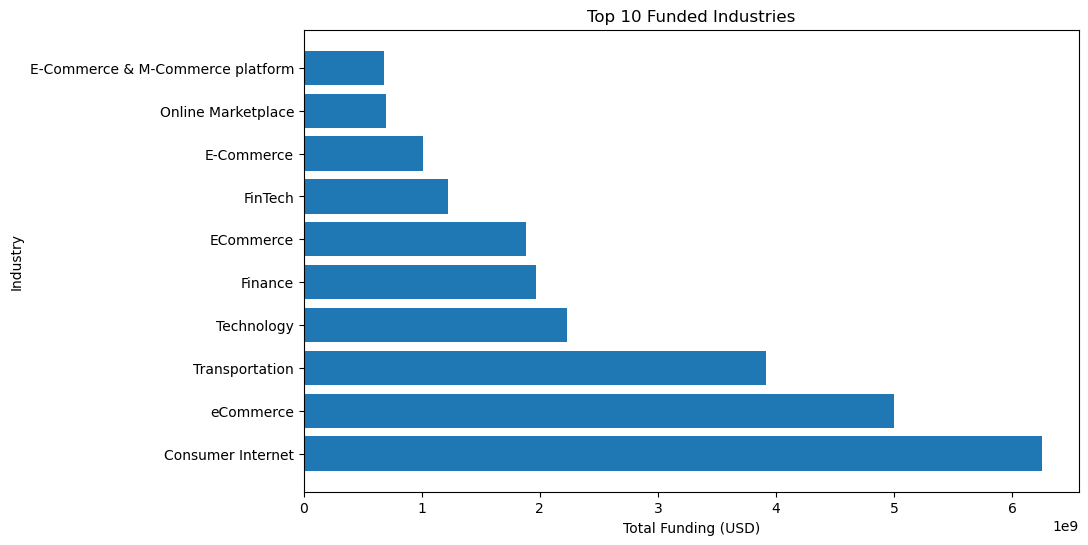

In [92]:

plt.figure(figsize=(10,6))
plt.barh(top_industries.index, top_industries.values)
plt.title("Top 10 Funded Industries")
plt.xlabel("Total Funding (USD)")
plt.ylabel("Industry")
plt.show()

In [93]:
import sqlite3

In [111]:
import os

In [94]:
# Create database
conn = sqlite3.connect("startup_funding.db")

In [95]:
# Load cleaned data into SQL table
df.to_sql("startups", conn, if_exists="replace", index=False)

3044

In [106]:
df.columns

Index(['Sr No', 'Date', 'Startup Name', 'Industry Vertical', 'SubVertical',
       'City  Location', 'Investors', 'InvestmentnType', 'Amount in USD',
       'Remarks', 'Year'],
      dtype='object')

In [123]:

query = """
SELECT [City  Location] as City,SUM("Amount in USD") AS Total_Funding
FROM startups
GROUP BY [City  Location]
ORDER BY Total_Funding DESC
LIMIT 10;
"""
result = pd.read_sql_query(query, conn)
print(result)
conn.close()

ProgrammingError: Cannot operate on a closed database.

In [124]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce') 

In [125]:
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d') 

In [127]:
df.to_csv("C:\\Users\\Dell\\OneDrive\\Attachments\\clean_startup_funding.csv", index=False)